# Exploratory Data Analysis (EDA)
## Financial Data Analysis

This notebook contains comprehensive analysis of financial data including:
- **Basic Analysis**: Data loading, statistics, missing values
- **Intermediate Analysis**: Time series trends, correlations, distributions
- **Advanced Analysis**: Financial ratios, company comparisons, volatility analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime
import glob

warnings.filterwarnings('ignore')

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Configuration
DATA_PATH = Path('../data/data_cleaned')
OUTPUT_PATH = Path('../EDA')

print("Libraries imported successfully!")
print(f"Data path: {DATA_PATH}")
print(f"Data path exists: {DATA_PATH.exists()}")


Libraries imported successfully!
Data path: ../data/data_cleaned
Data path exists: True


## 1. Basic Analysis

### 1.1 Loading Data


In [2]:
# Load all CSV files from the data directory
csv_files = list(DATA_PATH.glob('*.csv'))
print(f"Found {len(csv_files)} CSV files")

# Create a dictionary to store all dataframes
data_dict = {}

for file in csv_files:
    # Extract metric name from filename
    metric_name = file.stem
    try:
        df = pd.read_csv(file)
        data_dict[metric_name] = df
        print(f"✓ Loaded {metric_name}: {df.shape[0]} companies, {df.shape[1]-1} time periods")
    except Exception as e:
        print(f"✗ Error loading {metric_name}: {e}")

print(f"\nTotal metrics loaded: {len(data_dict)}")


Found 35 CSV files
✓ Loaded capital_work_in_progress: 2161 companies, 61 time periods
✓ Loaded change_in_stock: 2161 companies, 61 time periods
✓ Loaded current_assets: 2161 companies, 61 time periods
✓ Loaded current_liabilities_and_provision: 2161 companies, 61 time periods
✓ Loaded deferred_tax_liability: 2161 companies, 61 time periods
✓ Loaded depreciation: 2161 companies, 61 time periods
✓ Loaded dividend_rate: 2161 companies, 61 time periods
✓ Loaded effect_of_foreign_exchange_differences: 2161 companies, 61 time periods
✓ Loaded eps_after_extraordinary: 2161 companies, 61 time periods
✓ Loaded eps_before: 2161 companies, 61 time periods
✓ Loaded investments: 2161 companies, 61 time periods
✓ Loaded long_term_borrowings: 2161 companies, 61 time periods
✓ Loaded long_term_investments: 2161 companies, 61 time periods
✓ Loaded long_term_loans_and_advances: 2161 companies, 61 time periods
✓ Loaded net_cashflow_from_financing_activities: 2161 companies, 61 time periods
✓ Loaded net_c

In [3]:
# Display list of all metrics
print("Available metrics:")
for i, metric in enumerate(sorted(data_dict.keys()), 1):
    print(f"{i:2d}. {metric}")


Available metrics:
 1. capital_work_in_progress
 2. change_in_stock
 3. closing_price
 4. current_assets
 5. current_liabilities_and_provision
 6. deferred_tax_liability
 7. depreciation
 8. dividend_rate
 9. effect_of_foreign_exchange_differences
10. eps_after_extraordinary
11. eps_before
12. investments
13. long_term_borrowings
14. long_term_investments
15. long_term_loans_and_advances
16. net_cashflow_from_financing_activities
17. net_cashflow_from_investing_activities
18. net_cashflow_from_operating_activities
19. net_cashflow_inc_or_dec_due_to_cash_or_cash_eq
20. net_fixed_assets
21. net_pre_operative_expense
22. net_profit_loss_from_discontinued_ops
23. net_sales
24. non_promoter_share_as_a_percentage_of_total
25. other_income_and_extraordinary
26. other_non_current_assets
27. paid_up_capital
28. provision_and_contegencies
29. reserves
30. salaries_and_wages
31. share_holder_funds
32. short_term_borrowings
33. short_term_investments
34. short_term_loans_and_advances
35. total_oth

### 1.2 Data Structure and Basic Statistics


In [4]:
# Examine structure of a sample dataset
sample_metric = 'closing_price'
sample_df = data_dict[sample_metric]

print(f"Sample Dataset: {sample_metric}")
print(f"Shape: {sample_df.shape}")
print(f"\nColumn names (first 10): {list(sample_df.columns[:10])}")
print(f"\nFirst few rows:")
print(sample_df.head())
print(f"\nData types:")
print(sample_df.dtypes.value_counts())


Sample Dataset: closing_price
Shape: (2161, 65)

Column names (first 10): ['Unnamed: 0', 'Company Name', 'Jun 2010', 'Sep 2010', 'Dec 2010', 'Mar 2011', 'Jun 2011', 'Sep 2011', 'Dec 2011', 'Mar 2012']

First few rows:
   Unnamed: 0           Company Name  Jun 2010  Sep 2010  Dec 2010  Mar 2011  \
0           0        20 Microns Ltd.     41.10     57.45     45.20     37.15   
1           1    3B Blackbio Dx Ltd.     10.30     14.20     18.25     24.95   
2           2       3I Infotech Ltd.     60.45     60.15     59.75     43.80   
3           3          3M India Ltd.   2772.70   3976.20   3621.40   3351.00   
4           4  3P Land Holdings Ltd.     25.30     27.10     25.00     18.90   

   Jun 2011  Sep 2011  Dec 2011  Mar 2012  ...  Sep 2023  Dec 2023  Mar 2024  \
0     46.80     53.65     62.35     80.40  ...    133.40    176.55    143.70   
1     28.35     17.90     15.70     13.72  ...    785.80    789.55    769.60   
2     46.20     26.30     11.70     15.50  ...     40.39     

In [5]:
# Get all company names (should be consistent across datasets)
all_companies = set()
for metric, df in data_dict.items():
    if 'Company Name' in df.columns:
        all_companies.update(df['Company Name'].unique())

print(f"Total unique companies: {len(all_companies)}")
print(f"\nSample companies (first 20):")
for i, company in enumerate(sorted(all_companies)[:20], 1):
    print(f"{i:2d}. {company}")


Total unique companies: 2161

Sample companies (first 20):
 1. 20 Microns Ltd.
 2. 3B Blackbio Dx Ltd.
 3. 3I Infotech Ltd.
 4. 3M India Ltd.
 5. 3P Land Holdings Ltd.
 6. 52 Weeks Entertainment Ltd.
 7. 63 Moons Technologies Ltd.
 8. 7Seas Entertainment Ltd.
 9. A B B India Ltd.
10. A B Cotspin India Ltd.
11. A B M International Ltd.
12. A B M Knowledgeware Ltd.
13. A C C Ltd.
14. A C S Technologies Ltd.
15. A D F Foods Ltd.
16. A F Enterprises Ltd.
17. A G I Greenpac Ltd.
18. A G Ventures Ltd.
19. A I A Engineering Ltd.
20. A I Champdany Inds. Ltd.


### 1.3 Missing Values Analysis


In [6]:
# Analyze missing values across all datasets
missing_analysis = []

for metric, df in data_dict.items():
    # Get numeric columns (exclude 'Company Name')
    numeric_cols = [col for col in df.columns if col != 'Company Name']
    
    # Count zeros and NaN values
    total_cells = len(df) * len(numeric_cols)
    zero_count = (df[numeric_cols] == 0).sum().sum()
    nan_count = df[numeric_cols].isna().sum().sum()
    missing_pct = ((zero_count + nan_count) / total_cells) * 100
    
    missing_analysis.append({
        'Metric': metric,
        'Total_Cells': total_cells,
        'Zero_Values': zero_count,
        'NaN_Values': nan_count,
        'Missing_Percentage': missing_pct
    })

missing_df = pd.DataFrame(missing_analysis).sort_values('Missing_Percentage', ascending=False)
print("Missing Values Analysis (Top 15):")
print(missing_df.head(15).to_string(index=False))


Missing Values Analysis (Top 15):
                                        Metric  Total_Cells  Zero_Values  NaN_Values  Missing_Percentage
                                 dividend_rate       131821       131821           0          100.000000
   non_promoter_share_as_a_percentage_of_total       131821       131821           0          100.000000
                     net_pre_operative_expense       131821       131812           0           99.993173
        effect_of_foreign_exchange_differences       131821       130386           0           98.911403
         net_profit_loss_from_discontinued_ops       131821       129468           0           98.215004
                                      reserves       131821       127827           0           96.970134
        net_cashflow_from_financing_activities       131821       124467           0           94.421223
        net_cashflow_from_investing_activities       131821       124332           0           94.318811
net_cashflow_inc_or_d

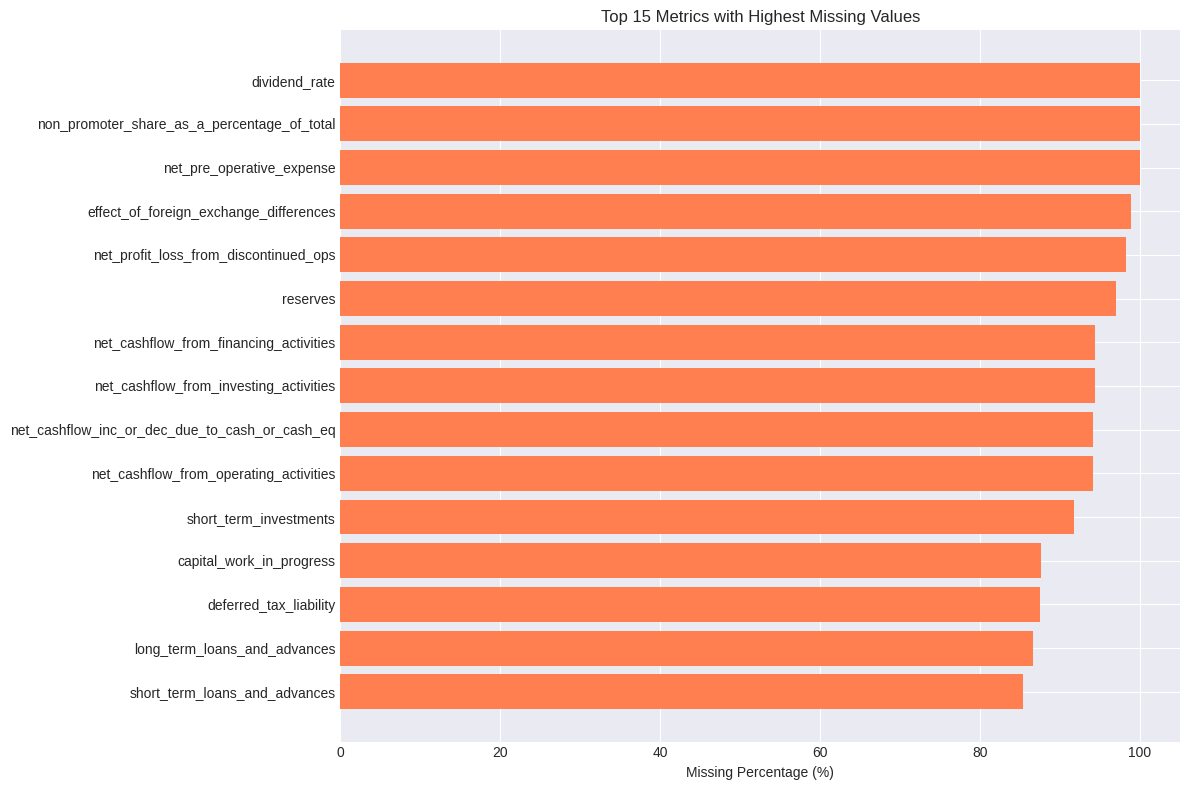

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 8))
top_missing = missing_df.head(15)
plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'], color='coral')
plt.yticks(range(len(top_missing)), top_missing['Metric'])
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Metrics with Highest Missing Values')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 1.4 Basic Descriptive Statistics


In [8]:
# Function to get statistics for a metric
def get_metric_stats(df, metric_name):
    numeric_cols = [col for col in df.columns if col != 'Company Name']
    values = df[numeric_cols].values.flatten()
    values = values[values != 0]  # Exclude zeros
    values = values[~np.isnan(values)]  # Exclude NaN
    
    if len(values) == 0:
        return None
    
    return {
        'Metric': metric_name,
        'Count': len(values),
        'Mean': np.mean(values),
        'Median': np.median(values),
        'Std': np.std(values),
        'Min': np.min(values),
        'Max': np.max(values),
        'Q25': np.percentile(values, 25),
        'Q75': np.percentile(values, 75)
    }

# Get statistics for key metrics
key_metrics = ['closing_price', 'net_sales', 'current_assets', 'current_liabilities_and_provision', 
               'net_profit_loss_from_discontinued_ops', 'eps_before', 'dividend_rate']

stats_list = []
for metric in key_metrics:
    if metric in data_dict:
        stats = get_metric_stats(data_dict[metric], metric)
        if stats:
            stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
print("Descriptive Statistics for Key Metrics:")
print(stats_df.to_string(index=False))


Descriptive Statistics for Key Metrics:
                               Metric  Count        Mean  Median          Std      Min       Max     Q25      Q75
                        closing_price 113989  436.049984  72.590  2376.819436     0.02 181470.65 19.0000  292.150
                            net_sales  59991 1753.448040 125.010  9253.460897    -0.75 261388.00 20.6350  643.235
                       current_assets  28368 4340.032686 302.745 19700.102039     0.01 747851.20 58.5675 1522.765
    current_liabilities_and_provision  28267 3433.962413 152.070 21796.730858    -2.94 784159.13 25.4450  808.690
net_profit_loss_from_discontinued_ops   2353   38.763659  -0.100   558.878369 -3392.50  14652.61 -2.8600    1.580
                           eps_before  60611    6.875328   1.320   124.399346 -1615.00  25114.87  0.0200    5.160


## 2. Intermediate Analysis

### 2.1 Time Series Data Preparation


In [9]:
# Function to convert wide format to long format (time series)
def prepare_time_series(df, metric_name):
    """
    Convert wide format (companies x time periods) to long format
    """
    df_melted = df.melt(
        id_vars=['Company Name'],
        var_name='Period',
        value_name='Value'
    )
    df_melted['Metric'] = metric_name
    
    # Convert period to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Period'], format='%b %Y', errors='coerce')
    
    # Remove rows with zero or NaN values
    df_melted = df_melted[(df_melted['Value'] != 0) & (df_melted['Value'].notna())]
    
    return df_melted

# Prepare time series for key metrics
key_metrics_ts = ['closing_price', 'net_sales', 'current_assets', 'eps_before']
time_series_data = []

for metric in key_metrics_ts:
    if metric in data_dict:
        ts_df = prepare_time_series(data_dict[metric], metric)
        time_series_data.append(ts_df)
        print(f"✓ Prepared {metric}: {len(ts_df)} records")

# Combine all time series
if time_series_data:
    combined_ts = pd.concat(time_series_data, ignore_index=True)
    print(f"\nTotal time series records: {len(combined_ts)}")
    print(f"Date range: {combined_ts['Date'].min()} to {combined_ts['Date'].max()}")


✓ Prepared closing_price: 113989 records
✓ Prepared net_sales: 59991 records
✓ Prepared current_assets: 28368 records
✓ Prepared eps_before: 60611 records

Total time series records: 262959
Date range: 2010-06-01 00:00:00 to 2025-12-01 00:00:00


### 2.2 Time Series Trends - Closing Price


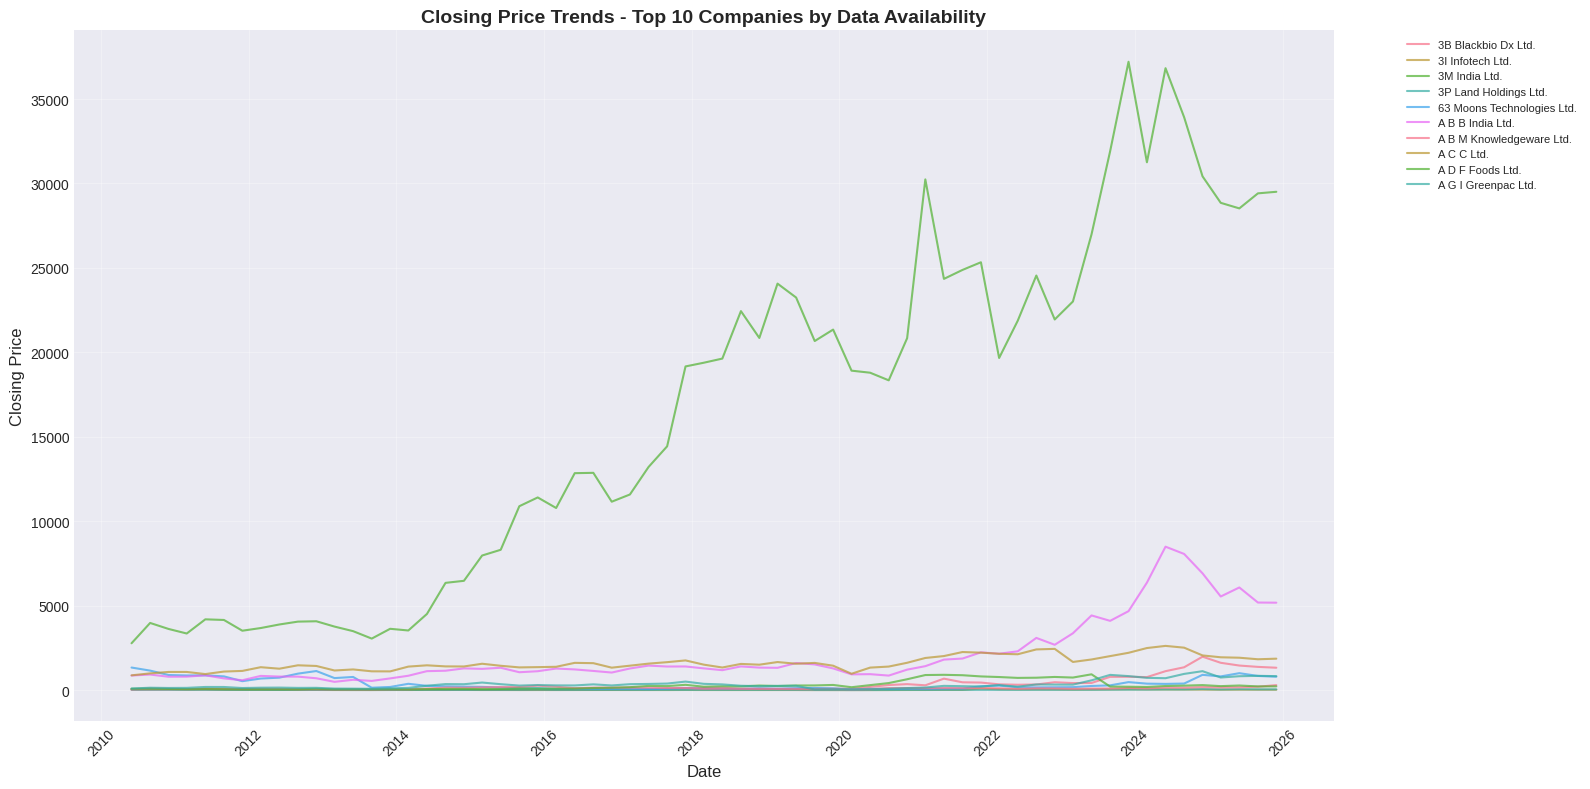

In [10]:
# Analyze closing price trends for top companies
if 'closing_price' in data_dict:
    price_df = data_dict['closing_price']
    
    # Get companies with most data points
    numeric_cols = [col for col in price_df.columns if col != 'Company Name']
    price_df['data_points'] = (price_df[numeric_cols] != 0).sum(axis=1)
    top_companies = price_df.nlargest(10, 'data_points')['Company Name'].tolist()
    
    # Prepare time series for top companies
    price_ts = prepare_time_series(price_df, 'closing_price')
    top_companies_ts = price_ts[price_ts['Company Name'].isin(top_companies)]
    
    # Plot time series for top companies
    plt.figure(figsize=(16, 8))
    for company in top_companies[:10]:
        company_data = top_companies_ts[top_companies_ts['Company Name'] == company].sort_values('Date')
        if len(company_data) > 0:
            plt.plot(company_data['Date'], company_data['Value'], label=company, alpha=0.7, linewidth=1.5)
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price', fontsize=12)
    plt.title('Closing Price Trends - Top 10 Companies by Data Availability', fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


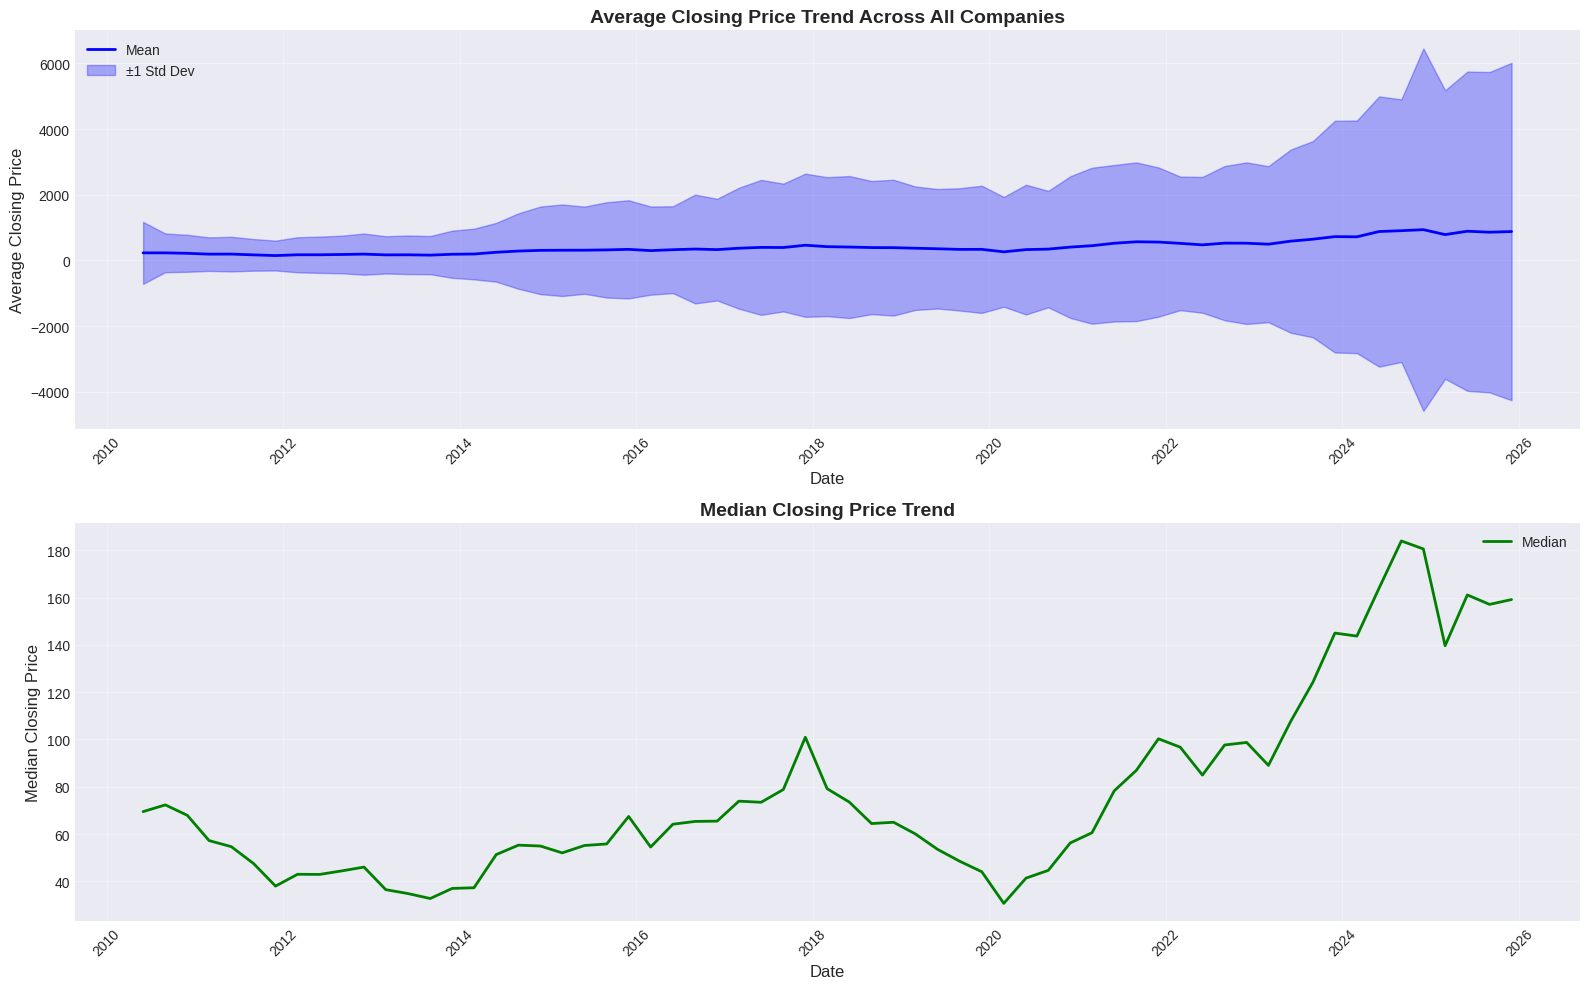

In [11]:
# Average closing price over time (aggregated across all companies)
if 'closing_price' in data_dict:
    price_ts = prepare_time_series(data_dict['closing_price'], 'closing_price')
    
    # Calculate average price per period
    avg_price = price_ts.groupby('Date')['Value'].agg(['mean', 'median', 'std']).reset_index()
    avg_price = avg_price.sort_values('Date')
    
    # Plot average price trend
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Mean price with confidence interval
    axes[0].plot(avg_price['Date'], avg_price['mean'], label='Mean', linewidth=2, color='blue')
    axes[0].fill_between(avg_price['Date'], 
                        avg_price['mean'] - avg_price['std'], 
                        avg_price['mean'] + avg_price['std'],
                        alpha=0.3, color='blue', label='±1 Std Dev')
    axes[0].set_xlabel('Date', fontsize=12)
    axes[0].set_ylabel('Average Closing Price', fontsize=12)
    axes[0].set_title('Average Closing Price Trend Across All Companies', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Median price
    axes[1].plot(avg_price['Date'], avg_price['median'], label='Median', linewidth=2, color='green')
    axes[1].set_xlabel('Date', fontsize=12)
    axes[1].set_ylabel('Median Closing Price', fontsize=12)
    axes[1].set_title('Median Closing Price Trend', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


### 2.3 Distribution Analysis


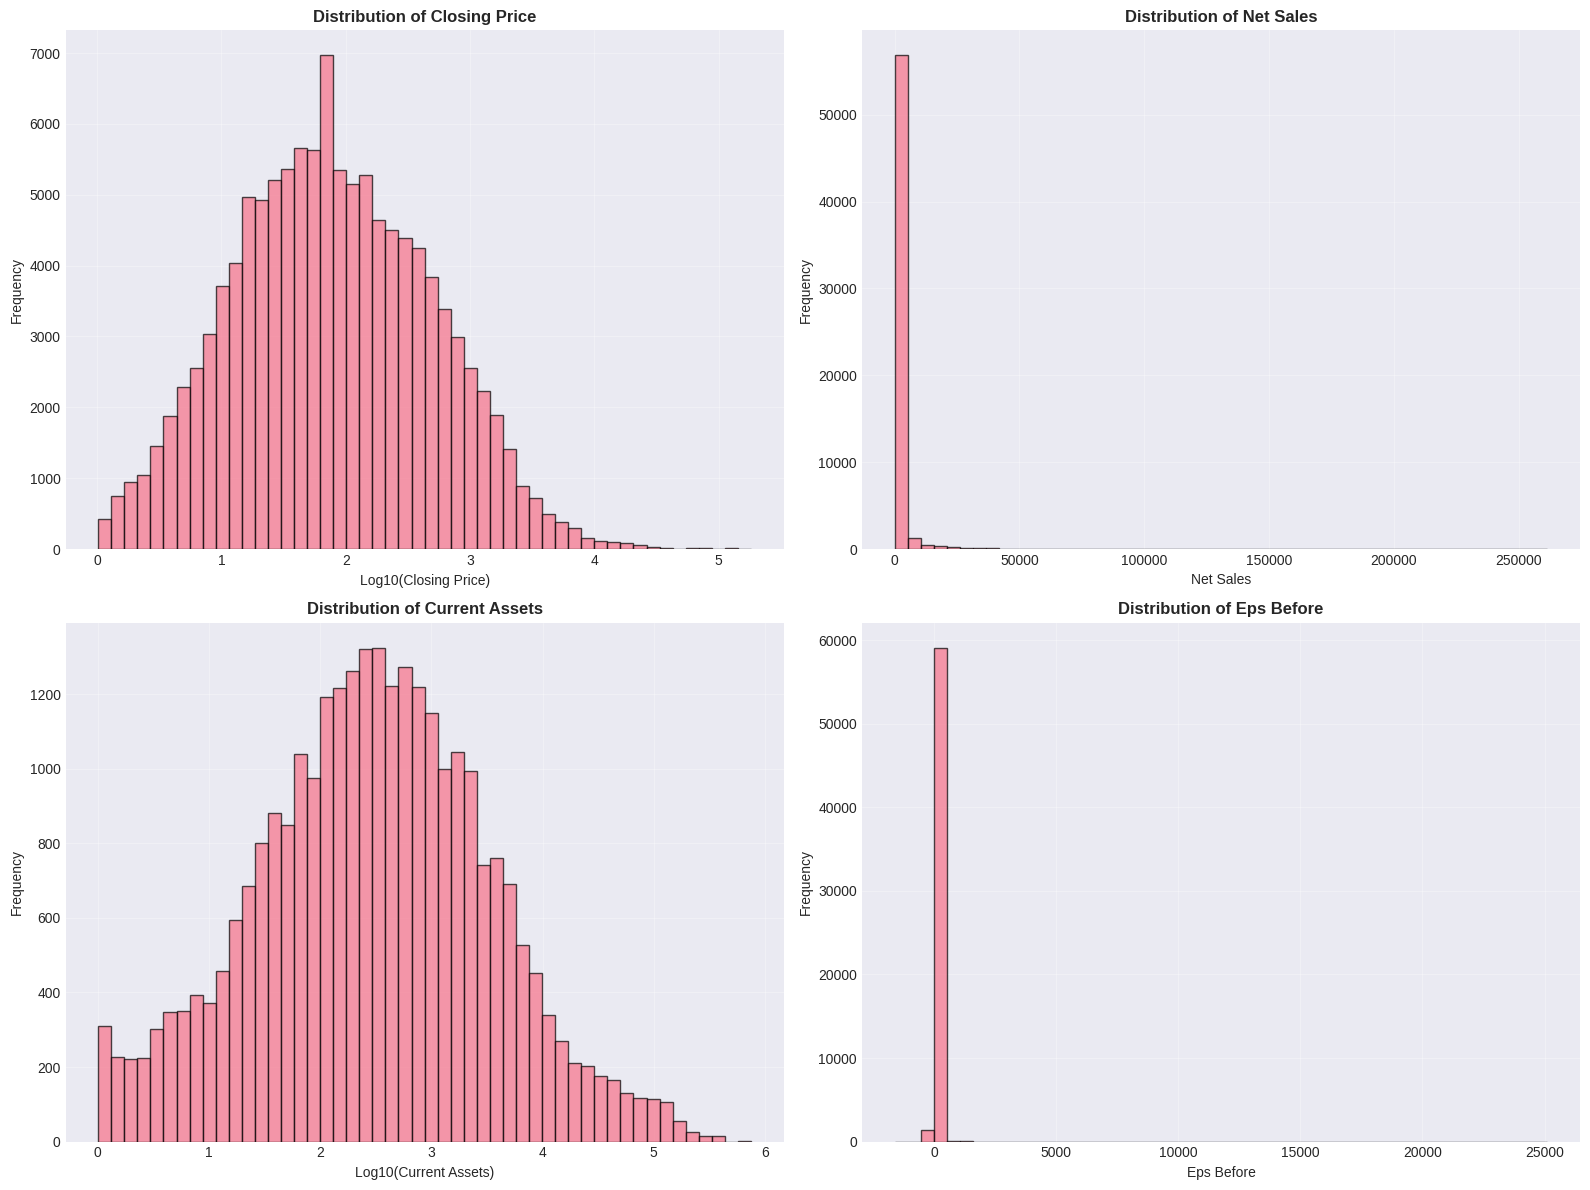

In [12]:
# Distribution of key financial metrics
key_metrics_dist = ['closing_price', 'net_sales', 'current_assets', 'eps_before']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, metric in enumerate(key_metrics_dist):
    if metric in data_dict:
        df = data_dict[metric]
        numeric_cols = [col for col in df.columns if col != 'Company Name']
        values = df[numeric_cols].values.flatten()
        values = values[(values != 0) & (~np.isnan(values))]
        
        if len(values) > 0:
            # Log transform for better visualization (if values are positive)
            if np.min(values) > 0:
                log_values = np.log10(values + 1)
                axes[idx].hist(log_values, bins=50, edgecolor='black', alpha=0.7)
                axes[idx].set_xlabel(f'Log10({metric.replace("_", " ").title()})', fontsize=10)
            else:
                axes[idx].hist(values, bins=50, edgecolor='black', alpha=0.7)
                axes[idx].set_xlabel(f'{metric.replace("_", " ").title()}', fontsize=10)
            
            axes[idx].set_ylabel('Frequency', fontsize=10)
            axes[idx].set_title(f'Distribution of {metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
            axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 2.4 Correlation Analysis


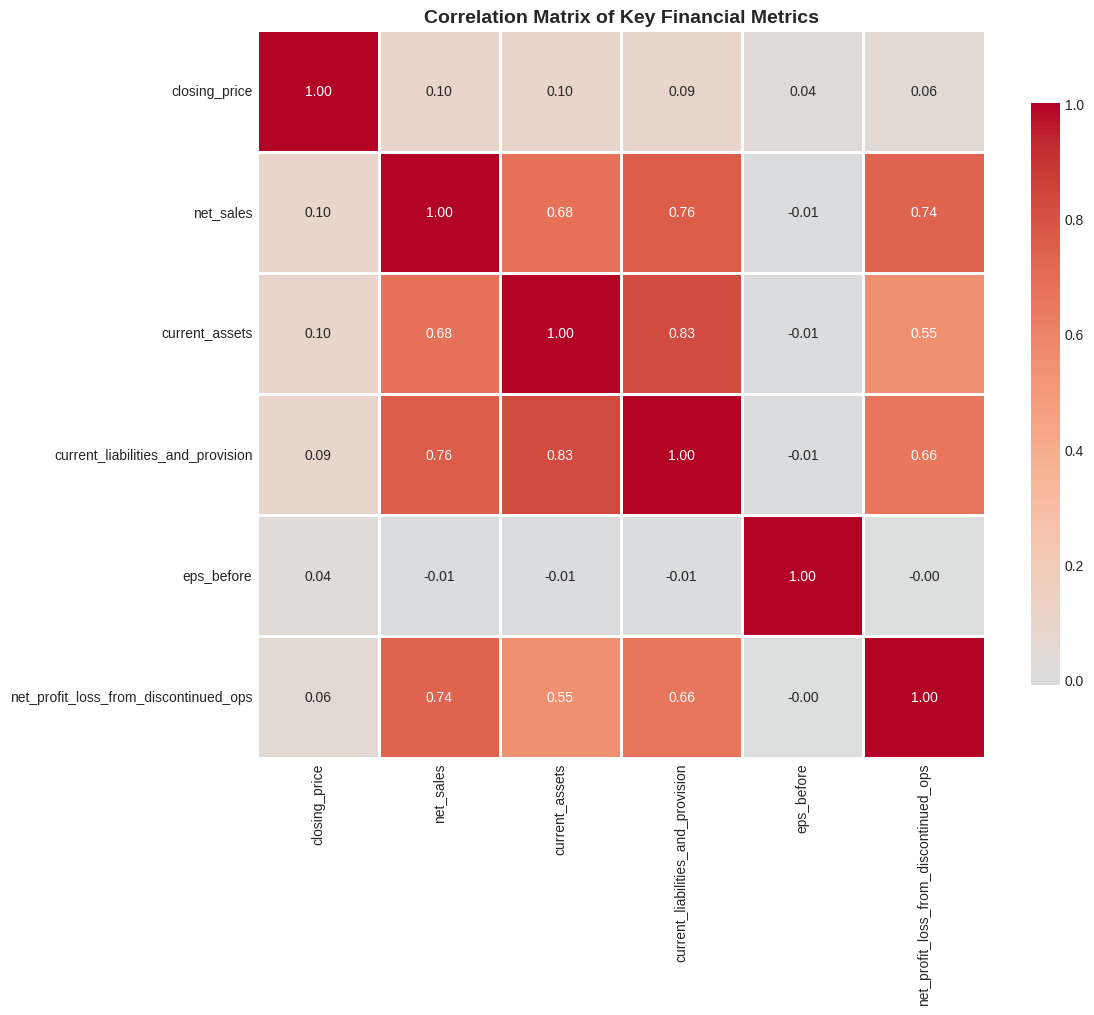

In [16]:
# Create a function to get latest values for each company across metrics
def get_latest_values(company_name, metrics_list):
    """Get the latest non-zero value for a company across multiple metrics"""
    latest_values = {}
    
    for metric in metrics_list:
        if metric in data_dict:
            df = data_dict[metric]
            company_data = df[df['Company Name'] == company_name]
            
            if len(company_data) > 0:
                numeric_cols = [col for col in company_data.columns if col != 'Company Name']
                values = company_data[numeric_cols].iloc[0].values
                # Get last non-zero value
                non_zero_values = values[values != 0]
                if len(non_zero_values) > 0:
                    latest_values[metric] = non_zero_values[-1]
    
    return latest_values

# Get correlation matrix for key metrics
correlation_metrics = ['closing_price', 'net_sales', 'current_assets', 'current_liabilities_and_provision',
                      'eps_before', 'dividend_rate', 'net_profit_loss_from_discontinued_ops']

# Get all companies that have data for at least 3 metrics
company_correlation_data = []
for company in sorted(all_companies)[:500]:  # Limit to first 500 for performance
    values = get_latest_values(company, correlation_metrics)
    if len(values) >= 3:  # At least 3 metrics
        values['Company'] = company
        company_correlation_data.append(values)

if company_correlation_data:
    corr_df = pd.DataFrame(company_correlation_data)
    corr_df = corr_df.set_index('Company')
    
    # Calculate correlation
    numeric_corr = corr_df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_corr.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix,  annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Key Financial Metrics', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


## 3. Advanced Analysis

### 3.1 Financial Ratios Analysis


In [14]:
# Calculate financial ratios for companies
def calculate_ratios(company_name):
    """Calculate key financial ratios for a company"""
    ratios = {'Company': company_name}
    
    # Current Ratio = Current Assets / Current Liabilities
    if 'current_assets' in data_dict and 'current_liabilities_and_provision' in data_dict:
        ca_df = data_dict['current_assets']
        cl_df = data_dict['current_liabilities_and_provision']
        
        ca_row = ca_df[ca_df['Company Name'] == company_name]
        cl_row = cl_df[cl_df['Company Name'] == company_name]
        
        if len(ca_row) > 0 and len(cl_row) > 0:
            numeric_cols = [col for col in ca_row.columns if col != 'Company Name']
            ca_values = ca_row[numeric_cols].iloc[0].values
            cl_values = cl_row[numeric_cols].iloc[0].values
            
            # Get latest non-zero values
            ca_nonzero = ca_values[ca_values != 0]
            cl_nonzero = cl_values[cl_values != 0]
            
            if len(ca_nonzero) > 0 and len(cl_nonzero) > 0:
                # Use latest available values
                ca_latest = ca_nonzero[-1]
                cl_latest = cl_nonzero[-1]
                if cl_latest != 0:
                    ratios['Current_Ratio'] = ca_latest / cl_latest
    
    # Price to Earnings (P/E) Ratio approximation
    if 'closing_price' in data_dict and 'eps_before' in data_dict:
        price_df = data_dict['closing_price']
        eps_df = data_dict['eps_before']
        
        price_row = price_df[price_df['Company Name'] == company_name]
        eps_row = eps_df[eps_df['Company Name'] == company_name]
        
        if len(price_row) > 0 and len(eps_row) > 0:
            numeric_cols = [col for col in price_row.columns if col != 'Company Name']
            price_values = price_row[numeric_cols].iloc[0].values
            eps_values = eps_row[numeric_cols].iloc[0].values
            
            price_nonzero = price_values[price_values != 0]
            eps_nonzero = eps_values[eps_values != 0]
            
            if len(price_nonzero) > 0 and len(eps_nonzero) > 0:
                price_latest = price_nonzero[-1]
                eps_latest = eps_nonzero[-1]
                if eps_latest != 0:
                    ratios['PE_Ratio'] = price_latest / eps_latest
    
    return ratios

# Calculate ratios for sample companies
sample_companies = sorted(all_companies)[:200]  # First 200 companies
ratio_data = []

for company in sample_companies:
    ratios = calculate_ratios(company)
    if len(ratios) > 1:  # More than just company name
        ratio_data.append(ratios)

if ratio_data:
    ratios_df = pd.DataFrame(ratio_data)
    print("Financial Ratios Summary:")
    print(ratios_df.describe())
    
    # Visualize ratios
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    if 'Current_Ratio' in ratios_df.columns:
        current_ratios = ratios_df['Current_Ratio'].dropna()
        if len(current_ratios) > 0:
            axes[0].hist(current_ratios, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
            axes[0].axvline(current_ratios.median(), color='red', linestyle='--', 
                          label=f'Median: {current_ratios.median():.2f}')
            axes[0].set_xlabel('Current Ratio', fontsize=12)
            axes[0].set_ylabel('Frequency', fontsize=12)
            axes[0].set_title('Distribution of Current Ratio', fontsize=14, fontweight='bold')
            axes[0].legend()
            axes[0].grid(True, alpha=0.3)
    
    if 'PE_Ratio' in ratios_df.columns:
        pe_ratios = ratios_df['PE_Ratio'].dropna()
        # Filter out extreme outliers
        pe_ratios = pe_ratios[(pe_ratios > 0) & (pe_ratios < 1000)]
        if len(pe_ratios) > 0:
            axes[1].hist(pe_ratios, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
            axes[1].axvline(pe_ratios.median(), color='red', linestyle='--', 
                          label=f'Median: {pe_ratios.median():.2f}')
            axes[1].set_xlabel('P/E Ratio', fontsize=12)
            axes[1].set_ylabel('Frequency', fontsize=12)
            axes[1].set_title('Distribution of P/E Ratio', fontsize=14, fontweight='bold')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


KeyError: "['Unnamed: 0', 'Sep 2025', 'Dec 2025', 'data_points'] not in index"

### 3.2 Company Performance Comparison


In [ ]:
# Compare top performing companies by different metrics
def get_top_companies_by_metric(metric_name, n=10, use_latest=True):
    """Get top N companies by a specific metric"""
    if metric_name not in data_dict:
        return None
    
    df = data_dict[metric_name]
    numeric_cols = [col for col in df.columns if col != 'Company Name']
    
    if use_latest:
        # Get latest non-zero value for each company
        df['latest_value'] = df[numeric_cols].apply(
            lambda row: row[row != 0].iloc[-1] if (row != 0).any() else 0, axis=1
        )
        top_companies = df.nlargest(n, 'latest_value')[['Company Name', 'latest_value']]
    else:
        # Get average value
        df['avg_value'] = df[numeric_cols].replace(0, np.nan).mean(axis=1)
        top_companies = df.nlargest(n, 'avg_value')[['Company Name', 'avg_value']]
    
    return top_companies

# Get top companies by different metrics
metrics_to_compare = ['closing_price', 'net_sales', 'current_assets', 'eps_before']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, metric in enumerate(metrics_to_compare):
    top_companies = get_top_companies_by_metric(metric, n=15)
    
    if top_companies is not None and len(top_companies) > 0:
        value_col = top_companies.columns[1]
        top_companies = top_companies.sort_values(value_col, ascending=True)
        
        axes[idx].barh(range(len(top_companies)), top_companies[value_col].values, color='steelblue')
        axes[idx].set_yticks(range(len(top_companies)))
        axes[idx].set_yticklabels(top_companies['Company Name'].values, fontsize=8)
        axes[idx].set_xlabel(f'{metric.replace("_", " ").title()}', fontsize=10)
        axes[idx].set_title(f'Top 15 Companies by {metric.replace("_", " ").title()}', 
                          fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


### 3.3 Volatility Analysis


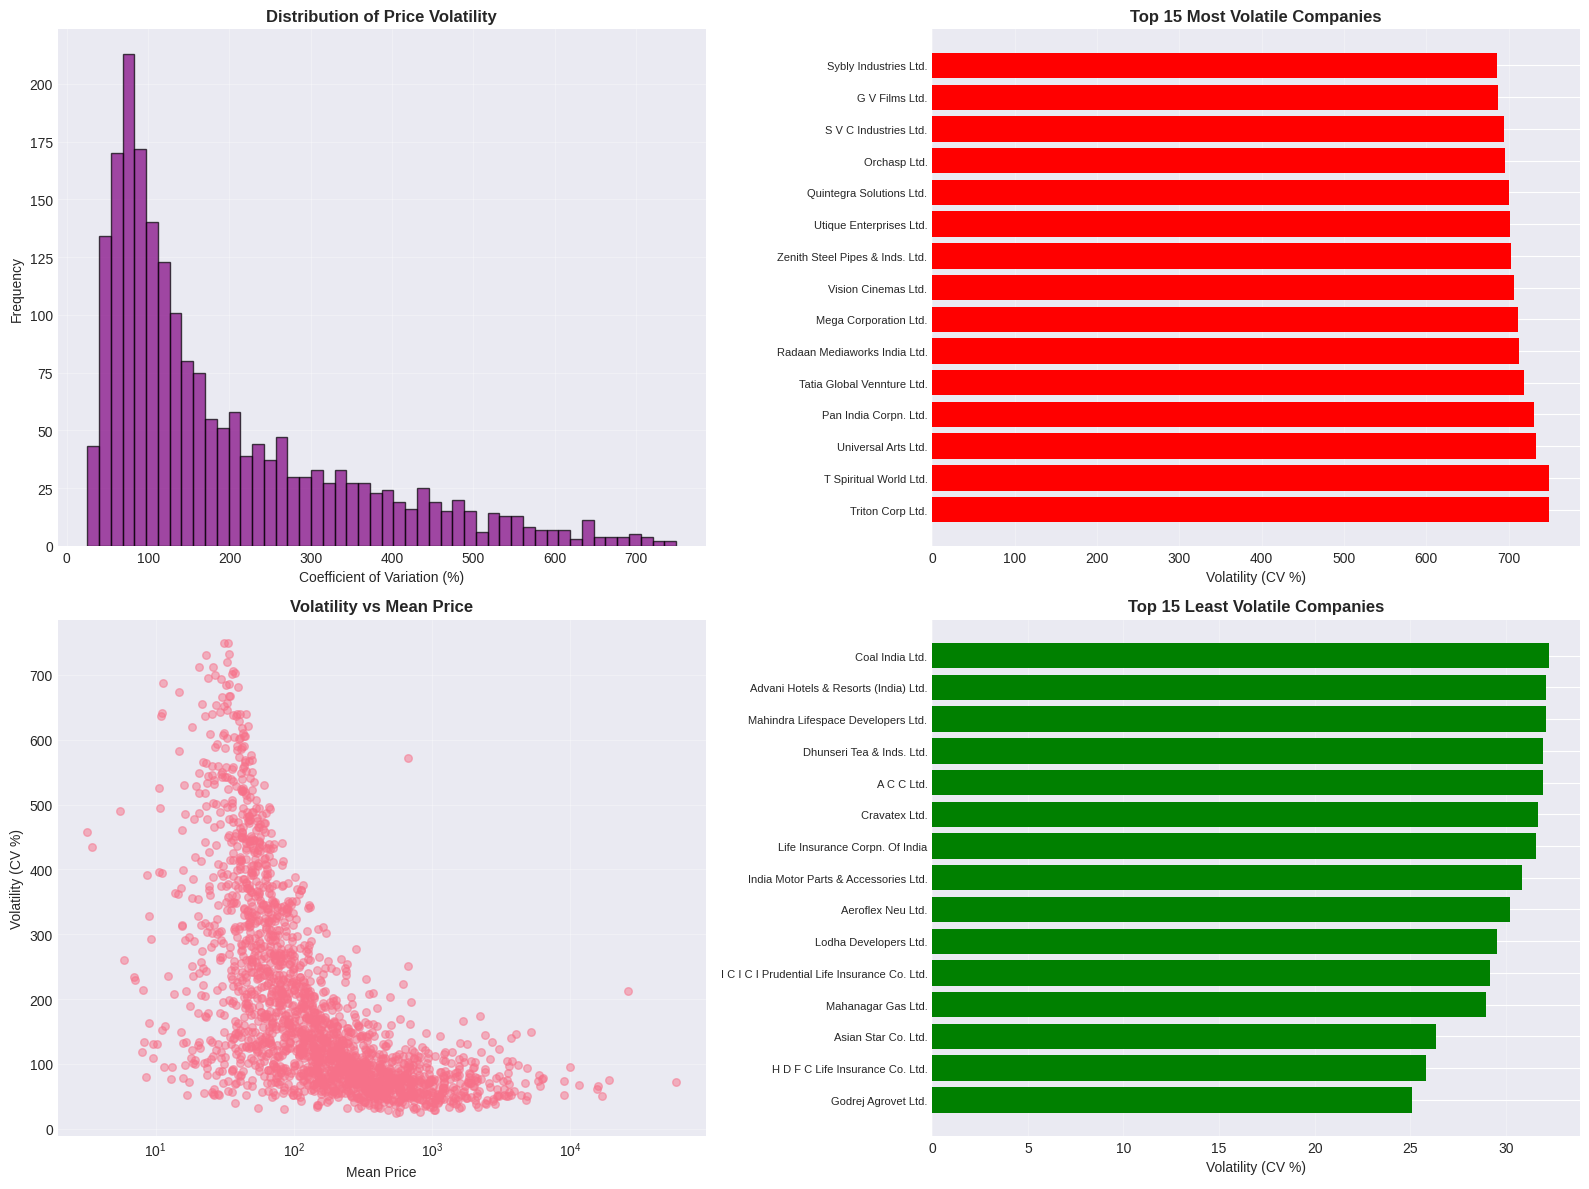


Volatility Statistics:
count    2079.000000
mean      192.088208
std       151.198774
min        25.084387
25%        80.107567
50%       132.645981
75%       263.159268
max       749.289984
Name: Volatility_CV, dtype: float64


In [17]:
# Calculate volatility (coefficient of variation) for closing prices
if 'closing_price' in data_dict:
    price_df = data_dict['closing_price']
    numeric_cols = [col for col in price_df.columns if col != 'Company Name']
    
    # Calculate volatility for each company
    volatility_data = []
    
    for idx, row in price_df.iterrows():
        company = row['Company Name']
        values = row[numeric_cols].values
        non_zero_values = values[values != 0]
        
        if len(non_zero_values) > 5:  # At least 5 data points
            mean_val = np.mean(non_zero_values)
            std_val = np.std(non_zero_values)
            if mean_val != 0:
                cv = (std_val / mean_val) * 100  # Coefficient of variation
                volatility_data.append({
                    'Company': company,
                    'Volatility_CV': cv,
                    'Mean_Price': mean_val,
                    'Std_Price': std_val
                })
    
    if volatility_data:
        vol_df = pd.DataFrame(volatility_data)
        
        # Plot volatility analysis
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Distribution of volatility
        axes[0, 0].hist(vol_df['Volatility_CV'], bins=50, edgecolor='black', alpha=0.7, color='purple')
        axes[0, 0].set_xlabel('Coefficient of Variation (%)', fontsize=10)
        axes[0, 0].set_ylabel('Frequency', fontsize=10)
        axes[0, 0].set_title('Distribution of Price Volatility', fontsize=12, fontweight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Top volatile companies
        top_volatile = vol_df.nlargest(15, 'Volatility_CV')
        axes[0, 1].barh(range(len(top_volatile)), top_volatile['Volatility_CV'].values, color='red')
        axes[0, 1].set_yticks(range(len(top_volatile)))
        axes[0, 1].set_yticklabels(top_volatile['Company'].values, fontsize=8)
        axes[0, 1].set_xlabel('Volatility (CV %)', fontsize=10)
        axes[0, 1].set_title('Top 15 Most Volatile Companies', fontsize=12, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3, axis='x')
        
        # Scatter: Volatility vs Mean Price
        axes[1, 0].scatter(vol_df['Mean_Price'], vol_df['Volatility_CV'], alpha=0.5, s=30)
        axes[1, 0].set_xlabel('Mean Price', fontsize=10)
        axes[1, 0].set_ylabel('Volatility (CV %)', fontsize=10)
        axes[1, 0].set_title('Volatility vs Mean Price', fontsize=12, fontweight='bold')
        axes[1, 0].set_xscale('log')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Least volatile companies
        least_volatile = vol_df.nsmallest(15, 'Volatility_CV')
        axes[1, 1].barh(range(len(least_volatile)), least_volatile['Volatility_CV'].values, color='green')
        axes[1, 1].set_yticks(range(len(least_volatile)))
        axes[1, 1].set_yticklabels(least_volatile['Company'].values, fontsize=8)
        axes[1, 1].set_xlabel('Volatility (CV %)', fontsize=10)
        axes[1, 1].set_title('Top 15 Least Volatile Companies', fontsize=12, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nVolatility Statistics:")
        print(vol_df['Volatility_CV'].describe())


### 3.4 Growth Rate Analysis


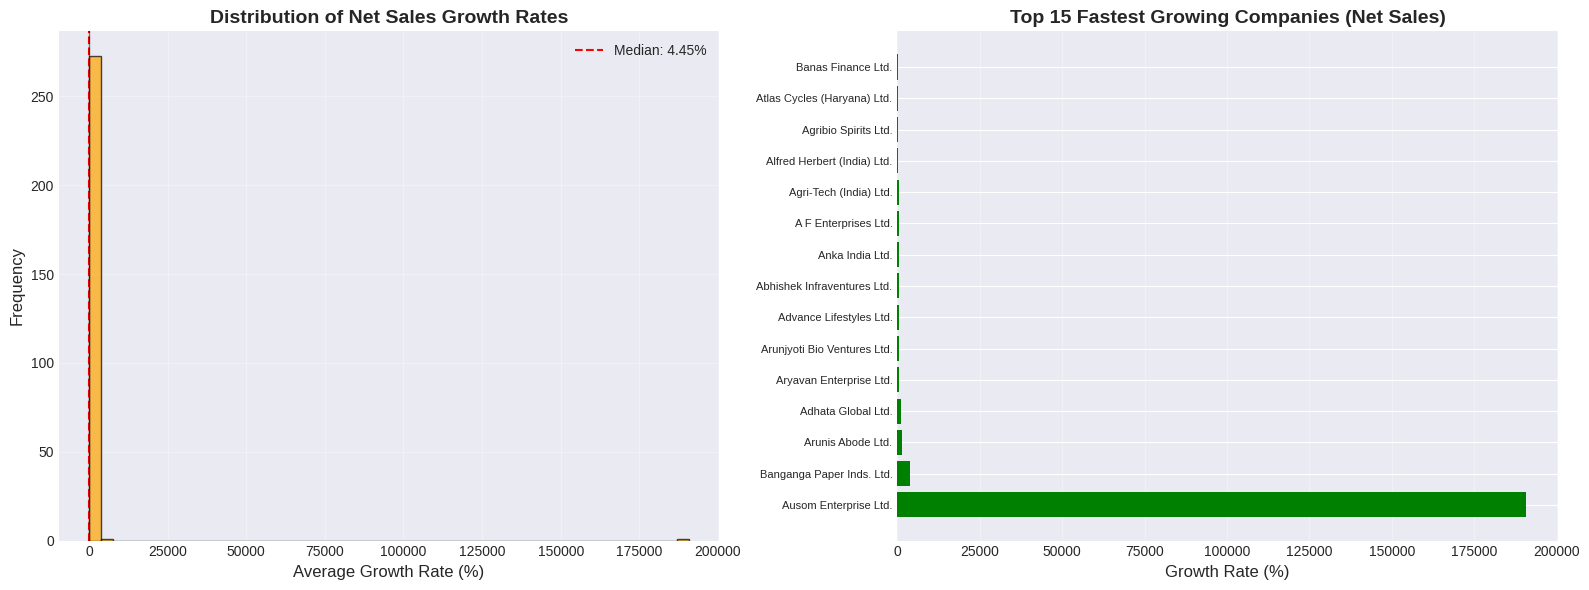


Growth Rate Statistics:
count       275.000000
mean        739.136124
std       11503.926744
min         -34.346285
25%           0.489279
50%           4.447541
75%          11.964592
max      190767.130511
Name: Growth_Rate, dtype: float64


In [18]:
# Calculate growth rates for key metrics
def calculate_growth_rate(df, company_name, periods=4):
    """Calculate average growth rate over last N periods"""
    company_data = df[df['Company Name'] == company_name]
    
    if len(company_data) == 0:
        return None
    
    numeric_cols = [col for col in company_data.columns if col != 'Company Name']
    values = company_data[numeric_cols].iloc[0].values
    non_zero_values = values[values != 0]
    
    if len(non_zero_values) < periods + 1:
        return None
    
    # Get last N+1 values
    recent_values = non_zero_values[-(periods+1):]
    
    # Calculate growth rates
    growth_rates = []
    for i in range(1, len(recent_values)):
        if recent_values[i-1] != 0:
            growth_rate = ((recent_values[i] - recent_values[i-1]) / abs(recent_values[i-1])) * 100
            growth_rates.append(growth_rate)
    
    if len(growth_rates) > 0:
        return np.mean(growth_rates)
    return None

# Calculate growth rates for net sales
if 'net_sales' in data_dict:
    growth_data = []
    sample_companies = sorted(all_companies)[:300]
    
    for company in sample_companies:
        growth_rate = calculate_growth_rate(data_dict['net_sales'], company, periods=4)
        if growth_rate is not None:
            growth_data.append({
                'Company': company,
                'Growth_Rate': growth_rate
            })
    
    if growth_data:
        growth_df = pd.DataFrame(growth_data)
        
        # Plot growth rate analysis
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Distribution of growth rates
        axes[0].hist(growth_df['Growth_Rate'], bins=50, edgecolor='black', alpha=0.7, color='orange')
        axes[0].axvline(growth_df['Growth_Rate'].median(), color='red', linestyle='--', 
                       label=f'Median: {growth_df["Growth_Rate"].median():.2f}%')
        axes[0].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
        axes[0].set_xlabel('Average Growth Rate (%)', fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        axes[0].set_title('Distribution of Net Sales Growth Rates', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Top growing companies
        top_growing = growth_df.nlargest(15, 'Growth_Rate')
        axes[1].barh(range(len(top_growing)), top_growing['Growth_Rate'].values, color='green')
        axes[1].set_yticks(range(len(top_growing)))
        axes[1].set_yticklabels(top_growing['Company'].values, fontsize=8)
        axes[1].set_xlabel('Growth Rate (%)', fontsize=12)
        axes[1].set_title('Top 15 Fastest Growing Companies (Net Sales)', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nGrowth Rate Statistics:")
        print(growth_df['Growth_Rate'].describe())


### 3.5 Cash Flow Analysis


Available cash flow metrics: 4/4


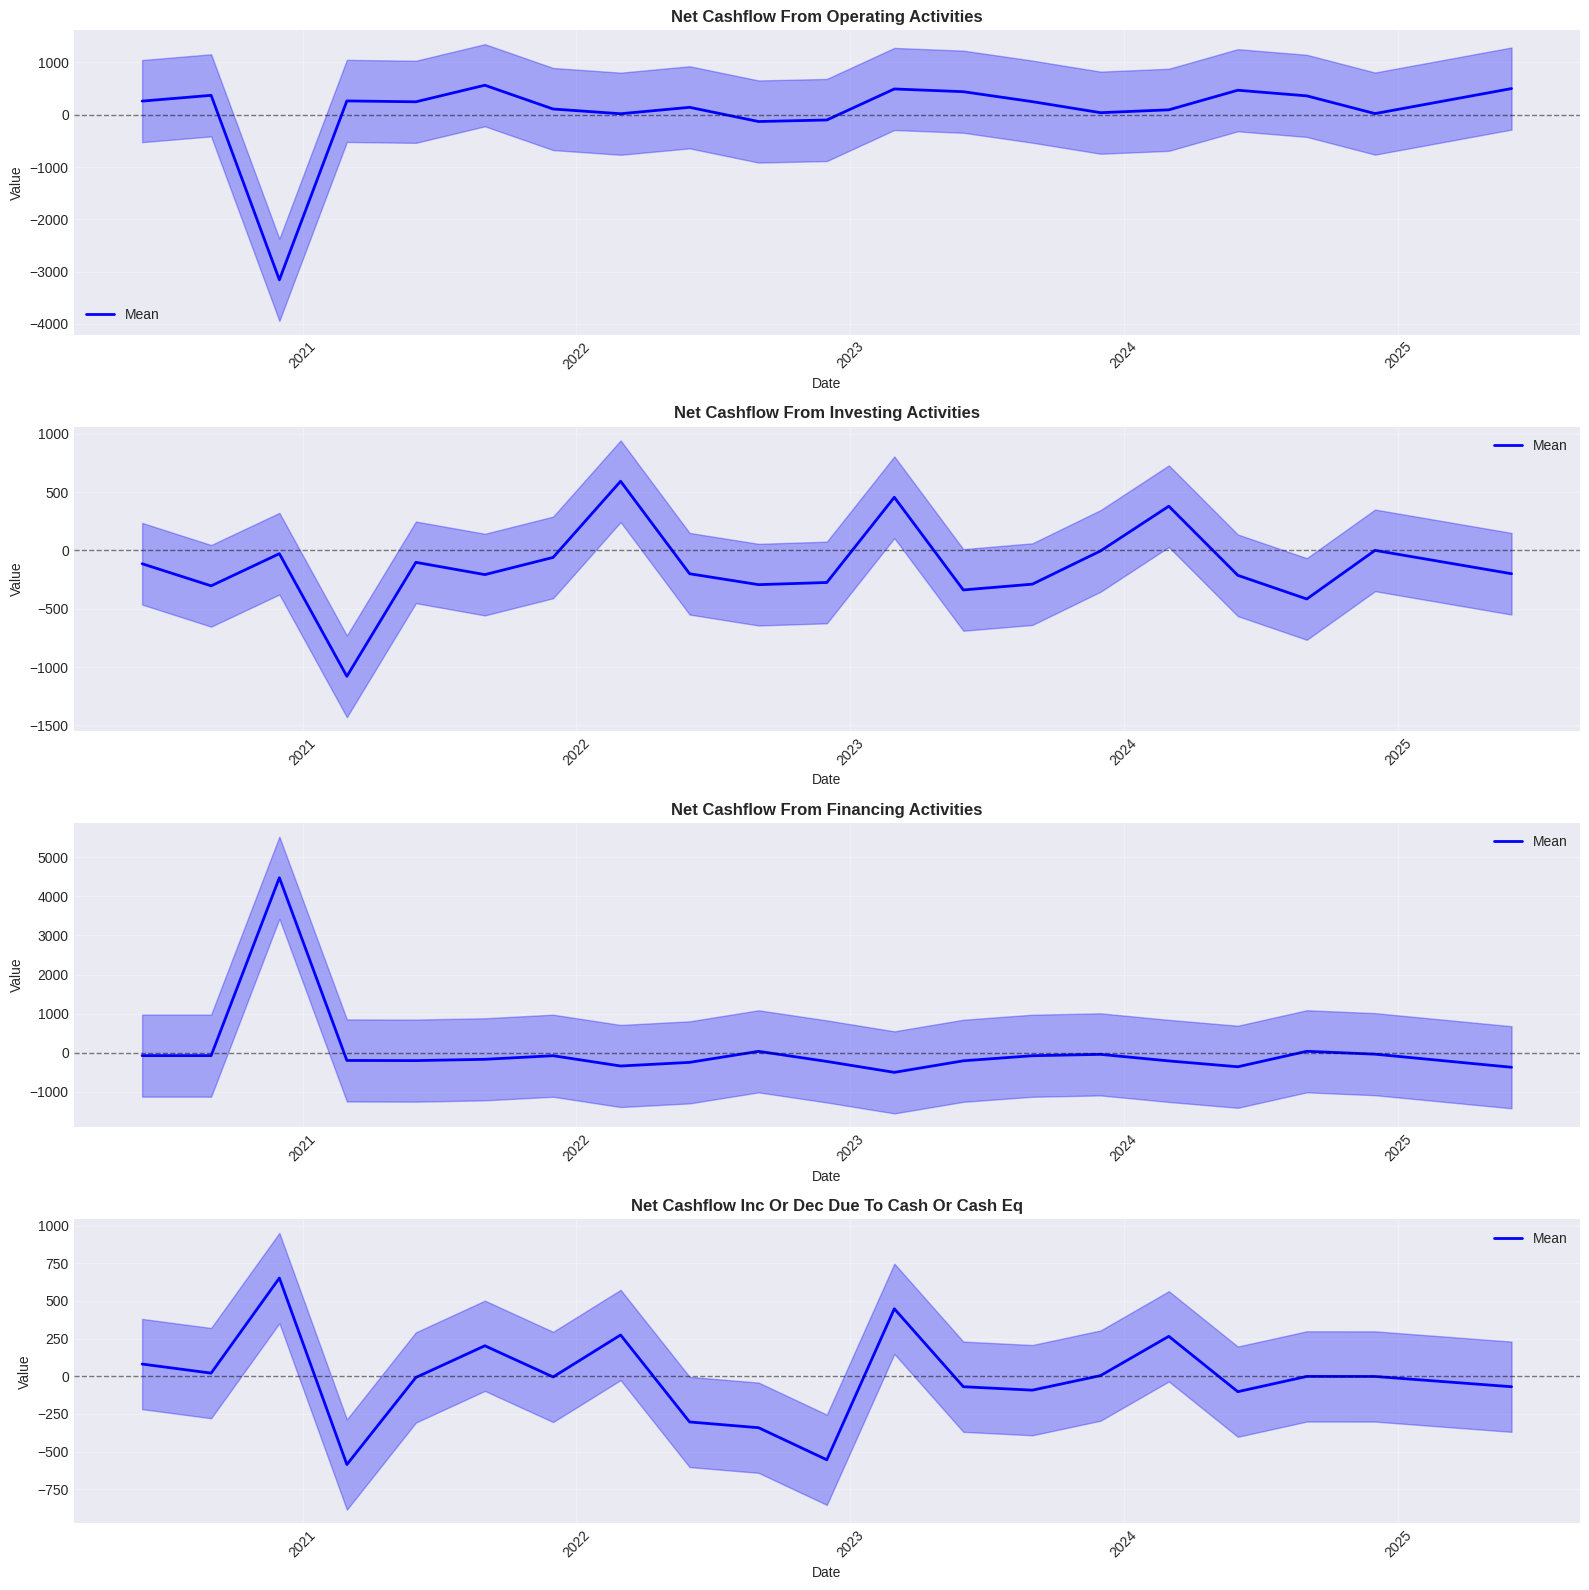

In [19]:
# Analyze cash flow metrics
cash_flow_metrics = [
    'net_cashflow_from_operating_activities',
    'net_cashflow_from_investing_activities',
    'net_cashflow_from_financing_activities',
    'net_cashflow_inc_or_dec_due_to_cash_or_cash_eq'
]

# Check which cash flow metrics are available
available_cf_metrics = [m for m in cash_flow_metrics if m in data_dict]
print(f"Available cash flow metrics: {len(available_cf_metrics)}/{len(cash_flow_metrics)}")

if available_cf_metrics:
    # Prepare time series for cash flow metrics
    cf_time_series = []
    for metric in available_cf_metrics:
        ts_df = prepare_time_series(data_dict[metric], metric)
        cf_time_series.append(ts_df)
    
    if cf_time_series:
        combined_cf = pd.concat(cf_time_series, ignore_index=True)
        
        # Aggregate by date and metric
        cf_summary = combined_cf.groupby(['Date', 'Metric'])['Value'].agg(['mean', 'sum']).reset_index()
        
        # Plot cash flow trends
        fig, axes = plt.subplots(len(available_cf_metrics), 1, figsize=(16, 4*len(available_cf_metrics)))
        if len(available_cf_metrics) == 1:
            axes = [axes]
        
        for idx, metric in enumerate(available_cf_metrics):
            metric_data = cf_summary[cf_summary['Metric'] == metric].sort_values('Date')
            
            axes[idx].plot(metric_data['Date'], metric_data['mean'], linewidth=2, label='Mean', color='blue')
            axes[idx].fill_between(metric_data['Date'], 
                                  metric_data['mean'] - metric_data['mean'].std(),
                                  metric_data['mean'] + metric_data['mean'].std(),
                                  alpha=0.3, color='blue')
            axes[idx].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
            axes[idx].set_xlabel('Date', fontsize=10)
            axes[idx].set_ylabel('Value', fontsize=10)
            axes[idx].set_title(f'{metric.replace("_", " ").title()}', fontsize=12, fontweight='bold')
            axes[idx].legend()
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()


### 3.6 Multi-Metric Company Profile


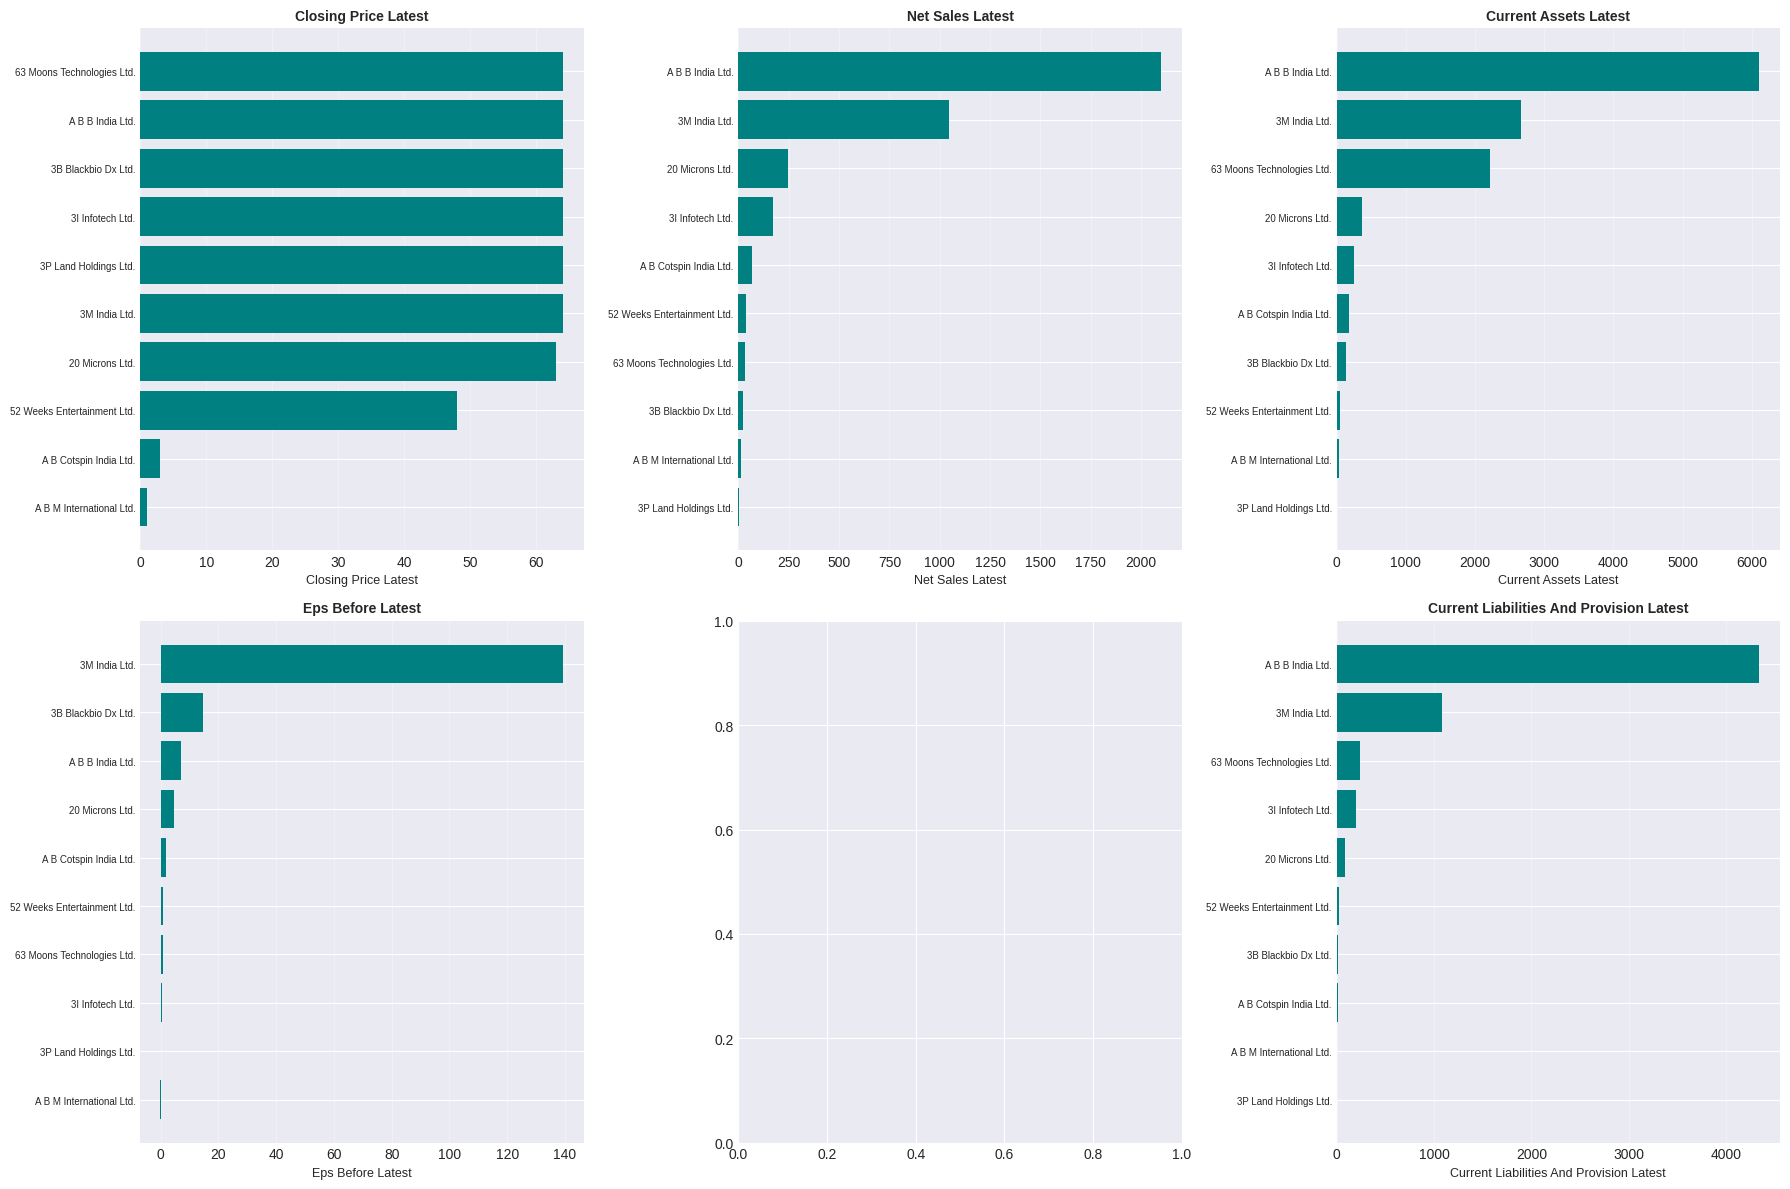

In [20]:
# Create comprehensive company profiles
def create_company_profile(company_name):
    """Create a comprehensive profile for a company"""
    profile = {'Company': company_name}
    
    key_metrics = ['closing_price', 'net_sales', 'current_assets', 'eps_before', 
                   'dividend_rate', 'current_liabilities_and_provision']
    
    for metric in key_metrics:
        if metric in data_dict:
            df = data_dict[metric]
            company_data = df[df['Company Name'] == company_name]
            
            if len(company_data) > 0:
                numeric_cols = [col for col in company_data.columns if col != 'Company Name']
                values = company_data[numeric_cols].iloc[0].values
                non_zero_values = values[values != 0]
                
                if len(non_zero_values) > 0:
                    profile[f'{metric}_latest'] = non_zero_values[-1]
                    profile[f'{metric}_mean'] = np.mean(non_zero_values)
                    profile[f'{metric}_std'] = np.std(non_zero_values)
    
    return profile

# Create profiles for sample companies
sample_companies = sorted(all_companies)[:100]
company_profiles = []

for company in sample_companies:
    profile = create_company_profile(company)
    if len(profile) > 1:  # More than just company name
        company_profiles.append(profile)

if company_profiles:
    profiles_df = pd.DataFrame(company_profiles)
    
    # Select companies with most complete data
    numeric_cols = profiles_df.select_dtypes(include=[np.number]).columns
    profiles_df['completeness'] = profiles_df[numeric_cols].notna().sum(axis=1)
    complete_profiles = profiles_df[profiles_df['completeness'] >= 10].head(10)
    
    # Visualize key metrics for top companies
    if len(complete_profiles) > 0:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        
        metrics_to_plot = ['closing_price_latest', 'net_sales_latest', 'current_assets_latest',
                          'eps_before_latest', 'dividend_rate_latest', 'current_liabilities_and_provision_latest']
        
        for idx, metric in enumerate(metrics_to_plot):
            if metric in complete_profiles.columns:
                data = complete_profiles[['Company', metric]].dropna().sort_values(metric, ascending=True)
                if len(data) > 0:
                    axes[idx].barh(range(len(data)), data[metric].values, color='teal')
                    axes[idx].set_yticks(range(len(data)))
                    axes[idx].set_yticklabels(data['Company'].values, fontsize=7)
                    axes[idx].set_xlabel(metric.replace('_', ' ').title(), fontsize=9)
                    axes[idx].set_title(f'{metric.replace("_", " ").title()}', fontsize=10, fontweight='bold')
                    axes[idx].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()


### 3.7 Time Period Analysis


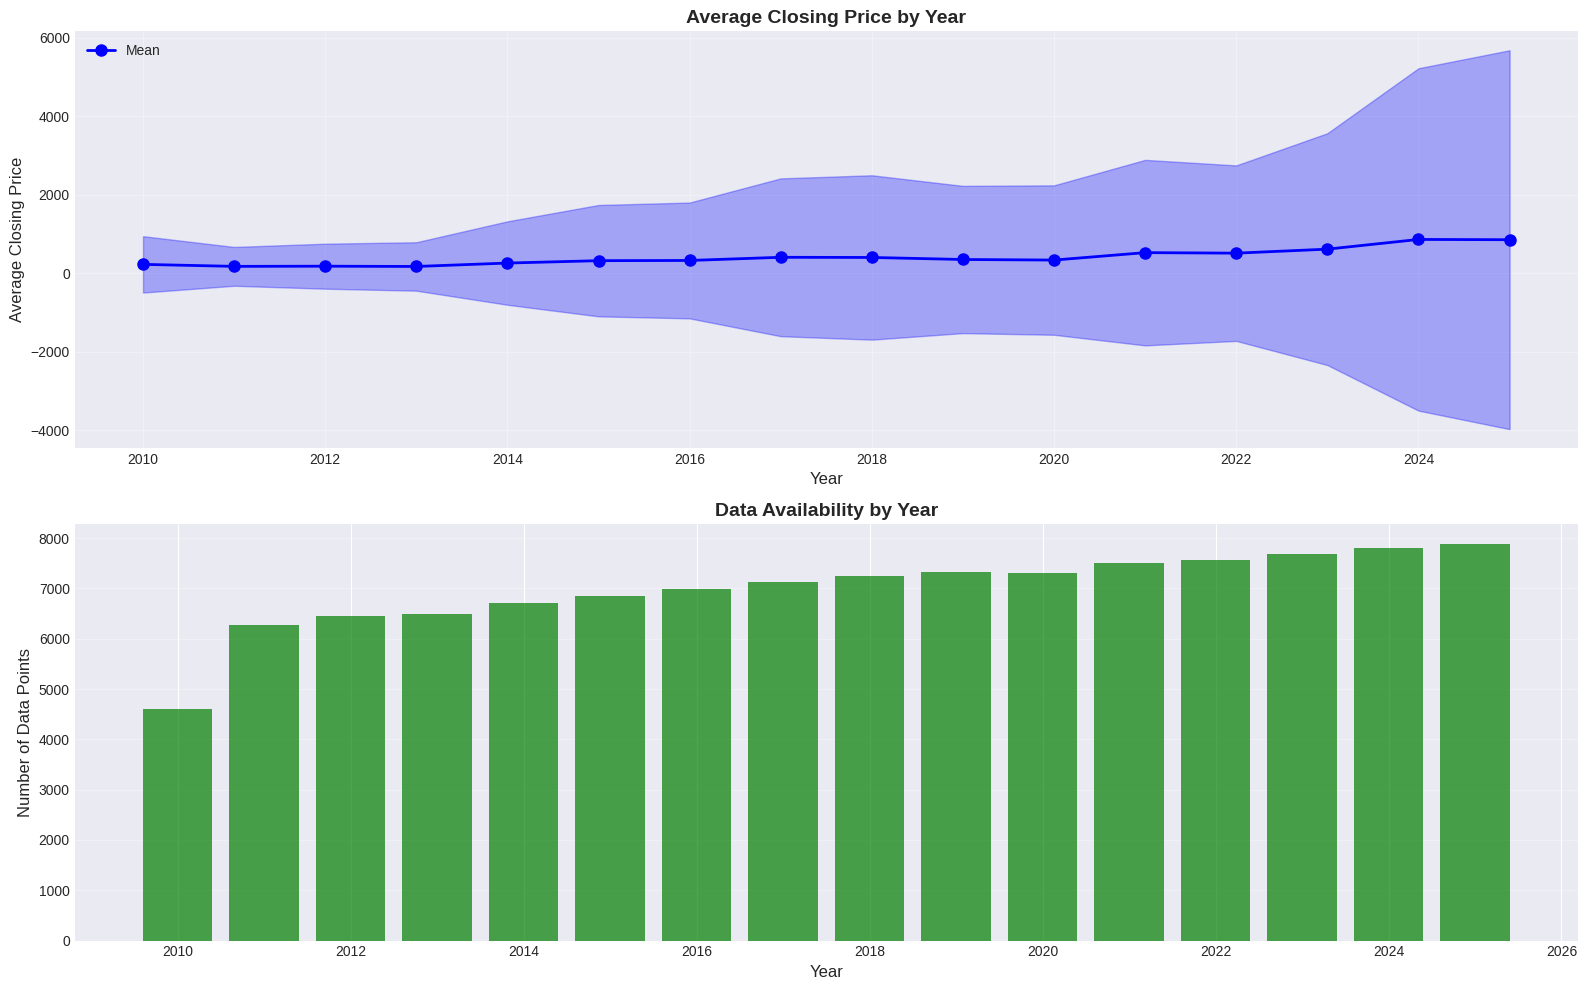

In [ ]:
# Analyze trends across different time periods
if 'closing_price' in data_dict:
    price_df = data_dict['closing_price']
    numeric_cols = [col for col in price_df.columns if col != 'Company Name']
    
    periods_by_year = {}
    for col in numeric_cols:
        try:
            date = pd.to_datetime(col, format='%b %Y')
            year = date.year
            if year not in periods_by_year:
                periods_by_year[year] = []
            periods_by_year[year].append(col)
        except:
            continue
    
    # Calculate average price by year
    yearly_avg = []
    for year in sorted(periods_by_year.keys()):
        year_cols = periods_by_year[year]
        year_values = price_df[year_cols].values.flatten()
        year_values = year_values[(year_values != 0) & (~np.isnan(year_values))]
        
        if len(year_values) > 0:
            yearly_avg.append({
                'Year': year,
                'Mean_Price': np.mean(year_values),
                'Median_Price': np.median(year_values),
                'Std_Price': np.std(year_values),
                'Count': len(year_values)
            })
    
    if yearly_avg:
        yearly_df = pd.DataFrame(yearly_avg)
        
        # Plot yearly trends
        fig, axes = plt.subplots(2, 1, figsize=(16, 10))
        
        # Mean price by year
        axes[0].plot(yearly_df['Year'], yearly_df['Mean_Price'], marker='o', linewidth=2, 
                    markersize=8, label='Mean', color='blue')
        axes[0].fill_between(yearly_df['Year'], 
                            yearly_df['Mean_Price'] - yearly_df['Std_Price'],
                            yearly_df['Mean_Price'] + yearly_df['Std_Price'],
                            alpha=0.3, color='blue')
        axes[0].set_xlabel('Year', fontsize=12)
        axes[0].set_ylabel('Average Closing Price', fontsize=12)
        axes[0].set_title('Average Closing Price by Year', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Number of data points by year
        axes[1].bar(yearly_df['Year'], yearly_df['Count'], color='green', alpha=0.7)
        axes[1].set_xlabel('Year', fontsize=12)
        axes[1].set_ylabel('Number of Data Points', fontsize=12)
        axes[1].set_title('Data Availability by Year', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()


## Summary and Key Insights

This EDA notebook has covered:

1. **Basic Analysis**: Data loading, structure examination, missing values, and descriptive statistics
2. **Intermediate Analysis**: Time series trends, distributions, and correlations
3. **Advanced Analysis**: Financial ratios, company comparisons, volatility, growth rates, cash flows, and temporal patterns

### Key Findings:
- Data spans multiple time periods from 2010 to 2025
- Various financial metrics available including prices, sales, assets, liabilities, and cash flows
- Significant variation in data completeness across companies and metrics
- Opportunities for further analysis including predictive modeling and risk assessment
